<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#OTU-rep-seqs" data-toc-modified-id="OTU-rep-seqs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>OTU rep seqs</a></span></li><li><span><a href="#Blastn-run" data-toc-modified-id="Blastn-run-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Blastn run</a></span></li><li><span><a href="#Parsing-blast-results" data-toc-modified-id="Parsing-blast-results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Parsing blast results</a></span><ul class="toc-item"><li><span><a href="#Adding-taxonomy" data-toc-modified-id="Adding-taxonomy-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Adding taxonomy</a></span></li></ul></li><li><span><a href="#Summarizing" data-toc-modified-id="Summarizing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summarizing</a></span><ul class="toc-item"><li><span><a href="#Number-of-OTUs-lacking-a-culture" data-toc-modified-id="Number-of-OTUs-lacking-a-culture-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Number of OTUs lacking a culture</a></span><ul class="toc-item"><li><span><a href="#Which-taxonomic-groups?" data-toc-modified-id="Which-taxonomic-groups?-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Which taxonomic groups?</a></span></li></ul></li><li><span><a href="#Prevalence-of-OTUs-lacking-cultures" data-toc-modified-id="Prevalence-of-OTUs-lacking-cultures-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Prevalence of OTUs lacking cultures</a></span></li><li><span><a href="#How-many-OTUs-for-major-clades?" data-toc-modified-id="How-many-OTUs-for-major-clades?-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>How many OTUs for major clades?</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Determine the closest type strains for each OTU in the dataset.
* Using SILVA "All-Species Living Tree Project" dataset, which comprises all 16S genes for all type strains

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/type_strain_similarity/'
tmp_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp/'

physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

rep_seq_qza_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/rep-seqs_merged_filt_r5k.qza'

LTP_blast_db_file = '/ebio/abt3_projects/databases/SILVA/all_species_living_tree/LTPs132_SSU_blastdb.fasta'

# params
hit_len_cutoff = 0.95   # fraction of query that must be aligned to subject
threads = 24

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# slower qsub job wait interval
options(future.wait.interval = 2.0)

In [4]:
make_dir(work_dir)
make_dir(tmp_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/type_strain_similarity/ 
Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp/ 


# OTU rep seqs

Converting to fasta

In [ ]:
cmd = 'qiime tools export %s --output-dir %s'
cmd = sprintf(cmd, rep_seq_qza_file, tmp_dir)
bash_job(cmd, conda_env='qiime2-2018.6')

In [5]:
dna_seq_file = file.path(tmp_dir, 'dna-sequences.fasta')
file.info(dna_seq_file)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp//dna-sequences.fasta,8721481,FALSE,644,2018-08-10 13:49:43,2018-08-10 13:50:03,2018-08-10 13:49:43,6354,353,nyoungblut,abt3


# Blastn run

In [5]:
blast_out_file = file.path(work_dir, 'rep-seqs_merged_filt_r5k_blastn-LTP.txt')
blast_out_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/type_strain_similarity//rep-seqs_merged_filt_r5k_blastn-LTP.txt"

In [7]:
outfmt = '\\"6 qaccver saccver pident length mismatch gapopen qlen qstart qend slen sstart send evalue\\"'
cmd = 'blastn -query %s -subject %s -out %s -evalue 1e-5 -num_threads %s -outfmt %s'
cmd = sprintf(cmd, dna_seq_file, LTP_blast_db_file, blast_out_file, threads, outfmt)
cmd

[1] "blastn -query /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp//dna-sequences.fasta -subject /ebio/abt3_projects/databases/SILVA/all_species_living_tree/LTPs132_SSU_blastdb.fasta -out /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/type_strain_similarity//rep-seqs_merged_filt_r5k_blastn-LTP.txt -evalue 1e-5 -num_threads 24 -outfmt \\\"6 qaccver saccver pident length mismatch gapopen qlen qstart qend slen sstart send evalue\\\""

In [ ]:
# running blast job
bash_job(cmd, conda_env='py3_genome')

In [ ]:
#send_email('http://127.0.0.1:9705/notebooks/notebooks/16S/1_LLA/11_closest_type_strains.ipynb')

In [8]:
# output file
file.info(blast_out_file)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/type_strain_similarity//rep-seqs_merged_filt_r5k_blastn-LTP.txt,1941745985,FALSE,644,2018-08-20 13:47:09,2018-08-20 13:47:09,2018-08-20 09:44:52,6354,353,nyoungblut,abt3


# Parsing blast results

**Length cutoff:** `Match alignment length is >=95 % length of query`

In [36]:
# load table
blast_res = data.table::fread(blast_out_file, sep='\t') %>%
    filter(V4 / V7 >= hit_len_cutoff,
           V3 >= 85)
colnames(blast_res) = c(
    'qaccver',
    'saccver',
    'pident',
    'length',
    'mismatch',
    'gapopen',
    'qlen',
    'qstart',
    'qend',
    'slen',
    'sstart',
    'send',
    'evalue')
blast_res %>% dfhead

[1] 3871318      13


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|FlsEndom\|1459bp\|Porphyromonadaceae\|HF969314,86.344,227,31,0,230,1,227,1459,533,759,6.15e-66
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|PorSomer\|1466bp\|Porphyromonadaceae\|AY968205,85.714,231,31,2,230,1,230,1466,533,762,2.86e-64
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|RikMicr2\|1472bp\|Rikenellaceae\|L16498,85.650,223,32,0,230,1,223,1472,553,775,1.33e-62


## Adding taxonomy

In [37]:
tax = physeq_file %>%
    readRDS() %>%
    tax_table() %>%
    as.matrix %>%
    as.data.frame() %>%
    mutate(OTU = rownames(.)) %>%
    dplyr::select(-Species)

tax %>% dfhead

[1] 30290     7


Domain,Phylum,Class,Order,Family,Genus,OTU
Bacteria,Candidate division SR1,unclassified,unclassified,unclassified,unclassified,ea2df9bcd7f6a10e0fa509d237d19c6d
Bacteria,Candidate division SR1,uncultured bacterium,,,,130b094f31455943fb20899a36af8afd
Bacteria,Candidate division SR1,uncultured bacterium,,,,b9b9562a0f34ad60c552f7f46d7a4b3b


In [38]:
blast_res = blast_res %>%
    inner_join(tax, c('qaccver'='OTU'))
tax = NULL

blast_res %>% dfhead

[1] 3221181      19


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue,Domain,Phylum,Class,Order,Family,Genus
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|FlsEndom\|1459bp\|Porphyromonadaceae\|HF969314,86.344,227,31,0,230,1,227,1459,533,759,6.15e-66,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|PorSomer\|1466bp\|Porphyromonadaceae\|AY968205,85.714,231,31,2,230,1,230,1466,533,762,2.86e-64,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella
0001fc475a4ad532d85da4d26068f1ec,lcl\|LTPs132_SSU\|RikMicr2\|1472bp\|Rikenellaceae\|L16498,85.650,223,32,0,230,1,223,1472,553,775,1.33e-62,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Rikenella


# Summarizing

## Number of OTUs lacking a culture

In [42]:
total_OTUs = 30290
cat('Total number of OTUs in the dataset:', total_OTUs, '\n')

Total number of OTUs in the dataset: 30290 


In [43]:
# total number of OTUs with a blast hit & taxonomy
# total_OTUs = blast_res$qaccver %>% unique %>% length
# total_OTUs

In [44]:
# max perc seqID of query
blast_res_s = blast_res %>%
    group_by(Domain, Phylum, Class, Order, Family, Genus, qaccver) %>%
    summarize(max_pident = max(pident)) %>%
    ungroup() 

blast_res_s$max_pident %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  85.00   88.70   92.21   92.37   96.09  100.00 

In [45]:
# filtering blast results
blast_res_s_s = blast_res_s %>%
    filter(max_pident < 97) %>%
    group_by(Domain, Phylum, Class, Order, Family, Genus) %>%
    summarize(n=n()) %>%
    ungroup()

blast_res_s_s$n %>% sum

[1] 20332

In [46]:
#' OTUs with a hit at specific seqID cutoff
otus_with_rep = function(seqid_cutoff, blast_res_s){
    blast_res_s %>%
        filter(max_pident < seqid_cutoff) %>%
        .$qaccver %>% unique %>% length
}

In [51]:
# checking multiple seqID cutoffs
seqID_cutoff = 85:100
n_remain = sapply(seqID_cutoff, otus_with_rep, blast_res_s=blast_res_s)

df = data.frame(seqID_cutoff = seqID_cutoff,
                n_OTUs = n_remain) %>%
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    arrange(-seqID_cutoff)

df

seqID_cutoff,n_OTUs,perc_OTUs_with_hit,perc_OTUs_without_hit
100,23379,22.81611,77.183889
99,22302,26.37174,73.628260
98,21449,29.18785,70.812149
97,20332,32.87554,67.124464
96,18218,39.85474,60.145262
95,16890,44.23902,55.760977
94,15510,48.79498,51.205018
93,13426,55.67514,44.324860
92,11787,61.08617,38.913833
91,10144,66.51040,33.489601


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/rep-seqs_merged_filt_r5k_blastn-LTP_nOTU.pdf 


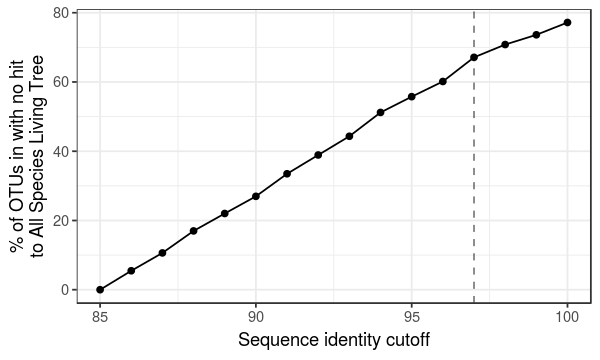

In [53]:
p = ggplot(df, aes(seqID_cutoff, perc_OTUs_without_hit)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line() +
    geom_point() +
    labs(x='Sequence identity cutoff',
         y='% of OTUs in with no hit\nto All Species Living Tree') +
    theme_bw() 

options(repr.plot.width=5, repr.plot.height=3)
plot_write(p, file='rep-seqs_merged_filt_r5k_blastn-LTP_nOTU.pdf')

### Which taxonomic groups?

In [57]:
#' OTUs with a hit
otus_with_rep = function(seqid_cutoff, blast_res_s){
    x = blast_res_s %>%
        filter(max_pident < seqid_cutoff) %>%
        distinct(Phylum, qaccver) %>%
        group_by(Phylum) %>%
        summarize(n_OTUs = n()) %>%
        ungroup()
    x$seqID_cutoff = seqid_cutoff
    return(x)
}

In [59]:
seqID_cutoff = 86:100
df = lapply(as.list(seqID_cutoff), 
                  otus_with_rep, 
                  blast_res_s=blast_res_s) %>%
    do.call(rbind, .) %>%
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    group_by(Phylum) %>%
    mutate(max_n_OTUs = max(n_OTUs)) %>%
    ungroup() %>%
    mutate(Phylum = Phylum %>% as.character,
           Phylum = ifelse(max_n_OTUs < 200, 'Other', Phylum))

tmp = df %>%
    filter(seqID_cutoff == 86) %>%
    mutate(perc_OTUs_with_hit = 100,
           seqID_cutoff = 85,
           perc_OTUs_without_hit = 0)

df = rbind(df, tmp)

df %>% dfhead

[1] 344   6


Phylum,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Actinobacteria,8,86,99.97359,0.02641136,494
Other,8,86,99.97359,0.02641136,10
Bacteroidetes,760,86,97.49092,2.50907890,3886


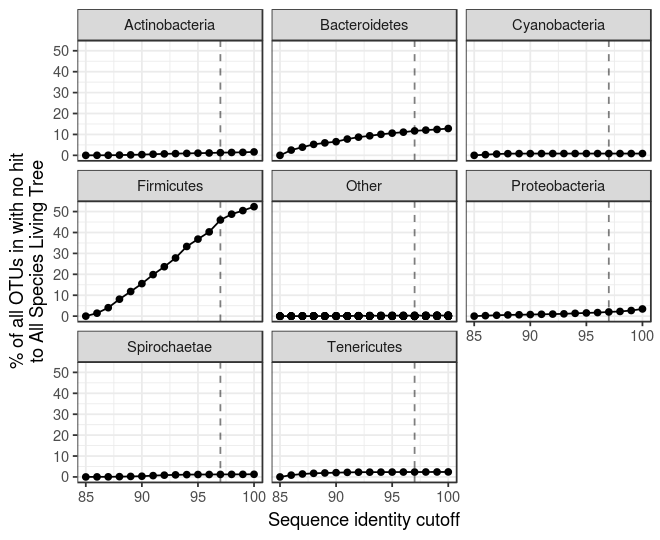

In [61]:
p = ggplot(df, aes(seqID_cutoff, perc_OTUs_without_hit)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line() +
    geom_point() +
    facet_wrap(~ Phylum) +
    labs(x='Sequence identity cutoff',
         y='% of all OTUs in with no hit\nto All Species Living Tree') +
    theme_bw() 

options(repr.plot.width=5.5, repr.plot.height=4.5)
plot(p, file='rep-seqs_merged_filt_r5k_blastn-LTP_nOTU-byPhylum.pdf')

In [65]:
# breakdown at 97% seqID
df %>%
    filter(seqID_cutoff == 97,
           Phylum != 'Other') %>%
    arrange(-perc_OTUs_without_hit)

Phylum,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Firmicutes,13929,97,54.01453,45.9854738,15854
Bacteroidetes,3540,97,88.31297,11.6870254,3886
Tenericutes,711,97,97.65269,2.3473093,726
Proteobacteria,606,97,97.99934,2.0006603,1042
Actinobacteria,387,97,98.72235,1.2776494,494
Spirochaetae,366,97,98.79168,1.2083196,384
Cyanobacteria,259,97,99.14493,0.8550677,259


In [66]:
# breakdown at 90% seqID
df %>%
    filter(seqID_cutoff == 90,
           Phylum != 'Other') %>%
    arrange(-perc_OTUs_without_hit)

Phylum,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,max_n_OTUs
Firmicutes,4710,90,84.45031,15.5496864,15854
Bacteroidetes,1976,90,93.47639,6.5236052,3886
Tenericutes,620,90,97.95312,2.0468802,726
Cyanobacteria,252,90,99.16804,0.8319577,259
Proteobacteria,230,90,99.24067,0.7593265,1042
Actinobacteria,104,90,99.65665,0.3433476,494
Spirochaetae,103,90,99.65995,0.3400462,384


## Prevalence of OTUs lacking cultures

In [67]:
# sample metadata 
metadata = physeq_file %>%
    readRDS() %>%
    sample_data() %>%
    as.matrix %>%
    as.data.frame() %>%
    mutate(Sample = rownames(.)) %>%
    dplyr::select(Sample, class, order, family, genus, scientific_name)

metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213   6


Sample,class,order,family,genus,scientific_name
X1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber
X101.Horse,Mammalia,Perissodactyla,Equidae,Equus,Equus_caballus
X102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,Equus_hemionus


In [68]:
# otu prevalence
otu_prev = physeq_file %>%
    readRDS() %>%
    otu_table() %>%
    as.matrix %>%
    as.data.frame() %>%
    mutate(OTU = rownames(.)) %>%
    gather(Sample, Count, -OTU) %>%
    mutate(Count = ifelse(Count > 0, 1, 0))

otu_prev %>% dfhead

[1] 6451770       3


OTU,Sample,Count
ea2df9bcd7f6a10e0fa509d237d19c6d,X1.Eurasian.Beaver,0
130b094f31455943fb20899a36af8afd,X1.Eurasian.Beaver,0
b9b9562a0f34ad60c552f7f46d7a4b3b,X1.Eurasian.Beaver,0


In [69]:
# host class level prevalence
otu_prev_s = otu_prev %>%
    inner_join(metadata, c('Sample'='Sample')) %>%
    group_by(class, OTU) %>%
    summarize(prev = sum(Count) / length(Count)) %>%
    ungroup()

otu_prev_s %>% dfhead

[1] 151450      3


class,OTU,prev
Actinopterygii,0001fc475a4ad532d85da4d26068f1ec,0
Actinopterygii,0003924139f23b61d50e68466e863de4,0
Actinopterygii,00057660e4817a98b6fad8f00075bf08,0


In [70]:
# joining tables
blast_res_s_s = blast_res_s %>%
    inner_join(otu_prev_s, c('qaccver'='OTU')) 

blast_res_s_s %>% dfhead

[1] 122425     10


Domain,Phylum,Class,Order,Family,Genus,qaccver,max_pident,class,prev
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,98.261,Actinopterygii,0.00000000
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,98.261,Amphibia,0.00000000
Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,fc08c7b9ba2cdfeb62d99e2009aa210b,98.261,Aves,0.03333333


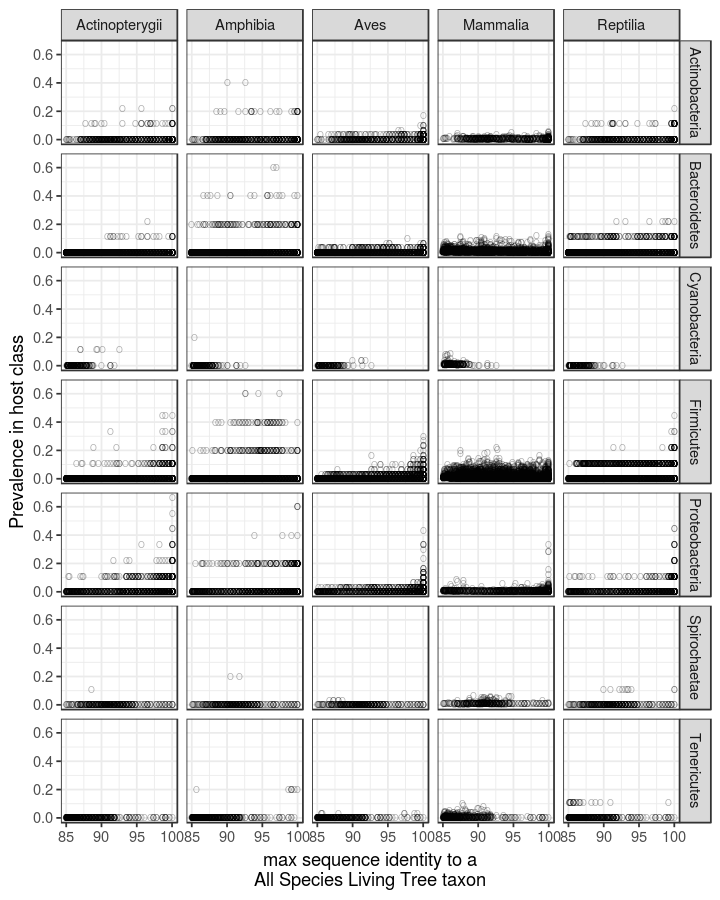

In [71]:
# distribution of max-seqID and prevalence in host clades
p = blast_res_s_s %>%
    group_by(Phylum) %>%
    mutate(n_OTUs = qaccver %>% unique %>% length) %>%
    ungroup() %>%
    mutate(Phylum = Phylum %>% as.character,
           Phylum = ifelse(n_OTUs < 200, 'Other', Phylum)) %>%
    filter(Phylum != 'Other') %>%
    ggplot(aes(max_pident, prev)) +
    geom_point(shape='O', alpha=0.3) +
    facet_grid(Phylum ~ class) +
    labs(x='max sequence identity to a\nAll Species Living Tree taxon',
         y='Prevalence in host class') +
    theme_bw() 

options(repr.plot.width=6, repr.plot.height=7.5)
plot(p)

In [72]:
# checking
blast_res_s_s %>%
    group_by(Phylum) %>%
    mutate(n_OTUs = qaccver %>% unique %>% length) %>%
    ungroup() %>%
    mutate(Phylum = Phylum %>% as.character,
           Phylum = ifelse(n_OTUs < 200, 'Other', Phylum)) %>%
    filter(Phylum != 'Other') %>%
    .$max_pident %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  85.00   88.65   92.21   92.33   96.09  100.00 

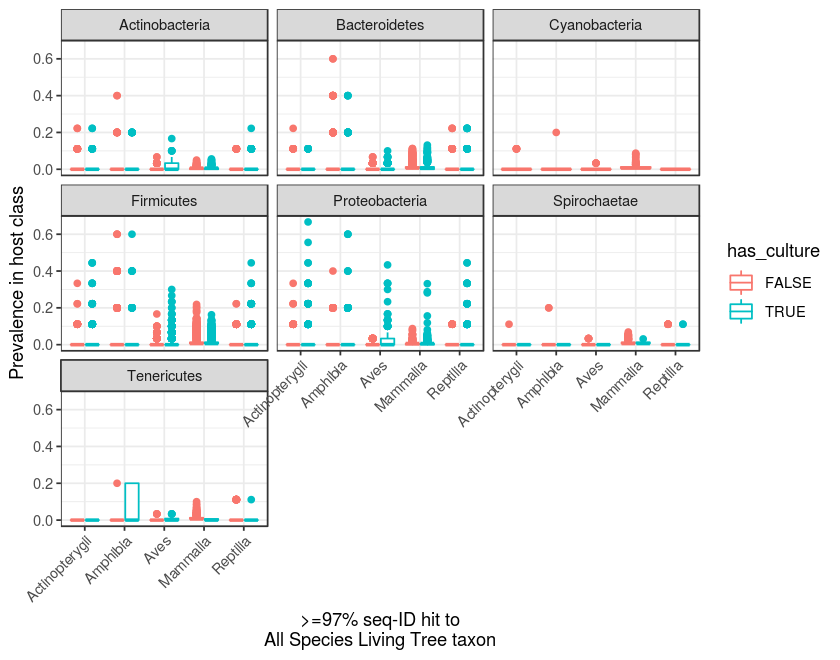

In [73]:
# distribution of max-seqID and prevalence in host clades
p = blast_res_s_s %>%
    group_by(Phylum) %>%
    mutate(n_OTUs = qaccver %>% unique %>% length) %>%
    ungroup() %>%
    mutate(Phylum = Phylum %>% as.character,
           Phylum = ifelse(n_OTUs < 200, 'Other', Phylum)) %>%
    filter(Phylum != 'Other') %>%
    mutate(has_culture = max_pident >= 97) %>%
    ggplot(aes(class, prev, color=has_culture)) +
    geom_boxplot() +
    facet_wrap(~ Phylum) +
    labs(x='>=97% seq-ID hit to\nAll Species Living Tree taxon',
         y='Prevalence in host class') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=7, repr.plot.height=5.5)
plot(p)

In [74]:
# summarizing 
blast_res_s_s_s = blast_res_s_s %>%
    filter(prev > 0) %>%
    group_by(Phylum) %>%
    mutate(n_OTUs = qaccver %>% unique %>% length,
           prev = prev * 100) %>%
    ungroup() %>%
    mutate(has_culture = max_pident >= 97) %>%
    group_by(Phylum, class, has_culture, qaccver) %>%
    summarize(present = sum(prev) > 0) %>%
    ungroup() %>%
    group_by(Phylum, class, has_culture) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    group_by(Phylum) %>%
    mutate(total_n = sum(n)) %>%
    ungroup() %>%
    filter(total_n > 100)

blast_res_s_s_s %>% dfhead

[1] 87  5


Phylum,class,has_culture,n,total_n
Actinobacteria,Actinopterygii,FALSE,19,711
Actinobacteria,Actinopterygii,TRUE,17,711
Actinobacteria,Amphibia,FALSE,15,711


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/rep-seqs_merged_filt_r5k_blastn-LTP_host-prev.pdf 


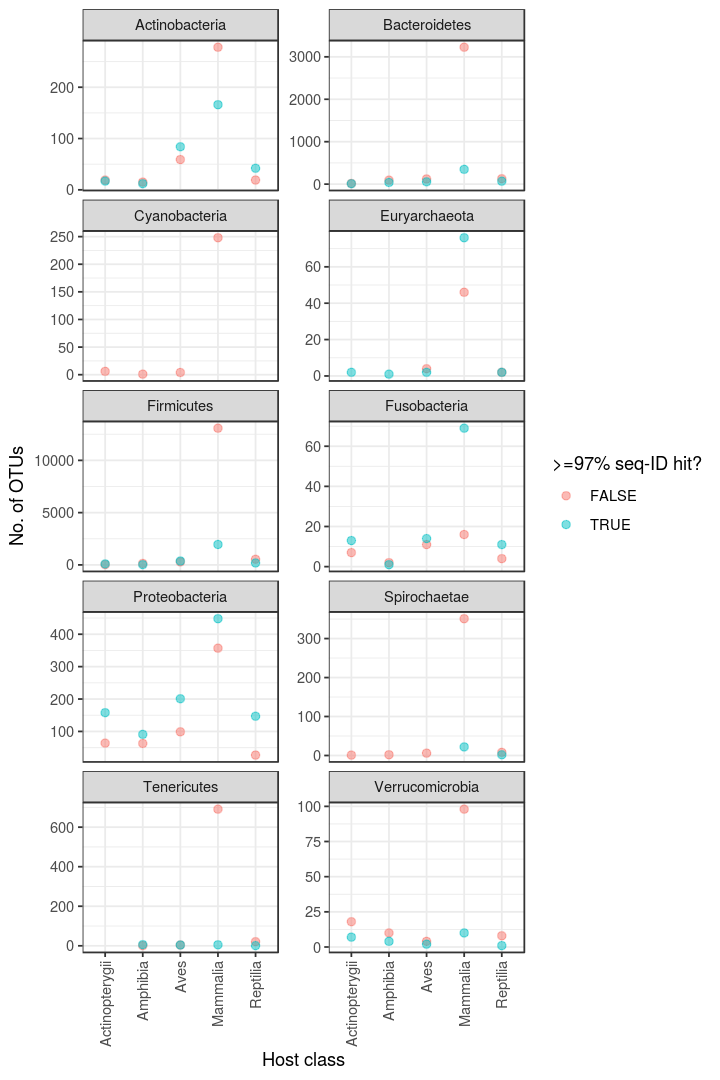

In [75]:
# plotting 
p = ggplot(blast_res_s_s_s, aes(class, n, color=has_culture)) +
    geom_point(alpha=0.5, size=2) +
    scale_color_discrete('>=97% seq-ID hit?') +
    facet_wrap(~ Phylum, scales='free_y', ncol=2) +
    labs(x='Host class',
         y='No. of OTUs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )

options(repr.plot.width=6, repr.plot.height=9)
plot_write(p, file='rep-seqs_merged_filt_r5k_blastn-LTP_host-prev.pdf')

In [76]:
# summarizing for non-cultured
blast_res_s_s_s = blast_res_s_s %>%
    #filter(prev > 0) %>%
    group_by(Phylum) %>%
    mutate(n_OTUs = qaccver %>% unique %>% length,
           prev = prev * 100) %>%
    ungroup() %>%
    mutate(Phylum = Phylum %>% as.character,
           Phylum = ifelse(n_OTUs < 200, 'Other', Phylum)) %>%
    filter(Phylum != 'Other') %>%
    mutate(has_culture = max_pident >= 97) %>%
    group_by(Phylum, class, has_culture) %>%
    summarize(mean_prev = mean(prev),
              sd_prev = sd(prev) / sqrt(length(prev))) %>%
    ungroup() 

blast_res_s_s_s %>% dfhead

[1] 65  5


Phylum,class,has_culture,mean_prev,sd_prev
Actinobacteria,Actinopterygii,FALSE,0.6029285,0.1404261
Actinobacteria,Actinopterygii,TRUE,0.7539683,0.1852309
Actinobacteria,Amphibia,FALSE,0.8785530,0.2328778


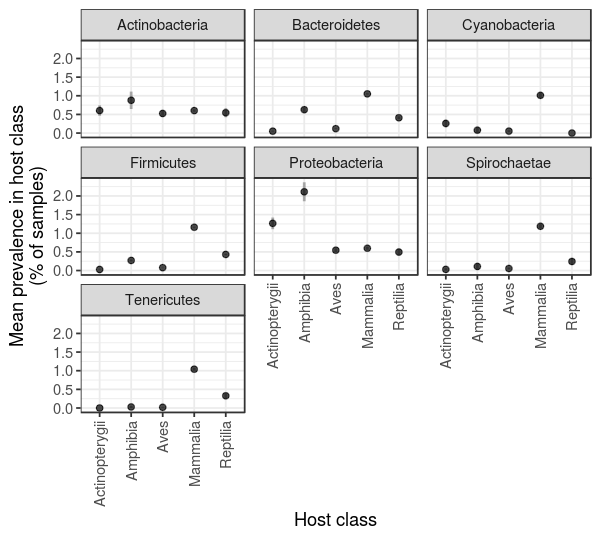

In [77]:
# plotting 
p = ggplot(blast_res_s_s_s %>% filter(has_culture == FALSE), 
           aes(class, mean_prev)) +
    geom_linerange(aes(ymin=mean_prev - sd_prev,
                       ymax=mean_prev + sd_prev), alpha=0.3, size=0.8) +
    geom_point(alpha=0.7) +
    facet_wrap(~ Phylum) +
    labs(x='Host class',
         y='Mean prevalence in host class\n(% of samples)') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )

options(repr.plot.width=5, repr.plot.height=4.5)
plot(p)

## How many OTUs for major clades?

In [80]:
clades = c('Actinobacteria', 'Proteobacteria', 'Verrucomicrobia')
blast_res_s_s %>%
    filter(Phylum %in% clades) %>%
    filter(class != 'Mammalia') %>%
    filter(prev > 0) %>%
    filter(max_pident < 97) %>%
    .$qaccver %>% unique %>% length

[1] 403

In [ ]:
# # distribution of max-seqID and prevalence in host clades
# p = ggplot(blast_res_s_s_s, aes(class, mean_prev, color=has_culture)) +
#     geom_linerange(aes(ymin=mean_prev - sd_prev,
#                        ymax=mean_prev + sd_prev), alpha=0.7) +
#     geom_point(alpha=0.7) +
#     facet_wrap(~ Phylum) +
#     labs(x='>=97% seq-ID hit to\nAll Species Living Tree taxon',
#          y='Prevalence in host class\n(% of samples)') +
#     theme_bw() +
#     theme(
#         axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
#     )

# options(repr.plot.width=7, repr.plot.height=5.5)
# plot(p)

In [ ]:
# # distribution of max-seqID and prevalence in host clades
# p = ggplot(blast_res_s_s_s, aes(Phylum, mean_prev, color=has_culture)) +
#     geom_linerange(aes(ymin=mean_prev - sd_prev,
#                        ymax=mean_prev + sd_prev), alpha=0.7) +
#     geom_point(alpha=0.7) +
#     facet_grid(class ~ .) +
#     labs(x='>=97% seq-ID hit to\nAll Species Living Tree taxon',
#          y='Prevalence in host class\n(% of samples)') +
#     theme_bw() +
#     theme(
#         axis.text.x = element_text(angle=45, hjust=1)
#     )

# options(repr.plot.width=5, repr.plot.height=5.5)
# plot(p)

In [ ]:
# # distribution of max-seqID and prevalence in host clades
# p = ggplot(blast_res_s_s_s %>% filter(has_culture == FALSE), 
#            aes(Phylum, mean_prev, color=class)) +
#     geom_linerange(aes(ymin=mean_prev - sd_prev,
#                        ymax=mean_prev + sd_prev), alpha=0.7) +
#     geom_point(alpha=0.7) +
#     labs(x='>=97% seq-ID hit to\nAll Species Living Tree taxon',
#          y='Mean prevalence in host class\n(% of samples)') +
#     theme_bw() +
#     theme(
#         axis.text.x = element_text(angle=45, hjust=1)
#     )

# options(repr.plot.width=6, repr.plot.height=3.5)
# plot(p)

In [ ]:
# # distribution of max-seqID and prevalence in host clades
# p = ggplot(blast_res_s_s_s %>% filter(has_culture == FALSE), 
#            aes(class, mean_prev, color=Phylum)) +
#     geom_linerange(aes(ymin=mean_prev - sd_prev,
#                        ymax=mean_prev + sd_prev), alpha=0.3, size=0.8) +
#     geom_point(alpha=0.7) +
#     labs(x='<97% seq-ID hit to any\nAll Species Living Tree taxon',
#          y='Mean prevalence in host class\n(% of samples)') +
#     theme_bw() +
#     theme(
#         axis.text.x = element_text(angle=45, hjust=1)
#     )

# options(repr.plot.width=5, repr.plot.height=4.5)
# plot(p)

In [ ]:
# # distribution of max-seqID and prevalence in host clades
# p = ggplot(blast_res_s_s_s %>% filter(has_culture == FALSE), 
#            aes(class, mean_prev)) +
#     geom_linerange(aes(ymin=mean_prev - sd_prev,
#                        ymax=mean_prev + sd_prev), alpha=0.3, size=0.8) +
#     geom_point(alpha=0.7) +
#     facet_wrap(~ Phylum) +
#     labs(x='<97% seq-ID hit to any\nAll Species Living Tree taxon',
#          y='Mean prevalence in host class\n(% of samples)') +
#     theme_bw() +
#     theme(
#         axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
#     )

# options(repr.plot.width=5, repr.plot.height=4.5)
# plot(p)

# sessionInfo

In [56]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2  phyloseq_1.22.3 ggplot2_3.0.0   tidyr_0.8.1    
[5] dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17        ape_5.1             lattice_0.20-34    
 [4] Biostrings_2.46.0   assertthat_0.2.0    digest_0.6.15      
 [7] foreach_1.4.4       IRdisplay_0.4.4     R6_2.2.2           
[10] plyr_1.8.4          repr_0.15.0         stats4_3.4.1       
[13] evaluate_0.10.1     pillar_1.2.2        zlibbioc_1.24.0    
[16] rlang_0.2.1         lazyeval_0.2.1      uuid_0.1-2         
[19] data.table_